In [1]:
!pip install git+http://hf.co/usm3d/tools.git    

  Cloning http://hf.co/usm3d/tools.git to /private/var/folders/kv/6wn44xbs3cn4m50_0n1fvyxr0000gn/T/pip-req-build-eh0z17vm
  Running command git clone --filter=blob:none --quiet http://hf.co/usm3d/tools.git /private/var/folders/kv/6wn44xbs3cn4m50_0n1fvyxr0000gn/T/pip-req-build-eh0z17vm
  Resolved http://hf.co/usm3d/tools.git to commit b9b359817988743e9b97e4191a84ab213ac3bef8
  Preparing metadata (setup.py) ... done
  Created wheel for hoho: filename=hoho-0.0.2-py3-none-any.whl size=19248 sha256=e4cb3dc2d5e6173de34cb8c803c92d6ffa79aabe85bcf9ebec51647425495091
  Stored in directory: /private/var/folders/kv/6wn44xbs3cn4m50_0n1fvyxr0000gn/T/pip-ephem-wheel-cache-n7m6sg94/wheels/53/aa/b8/5c791ee207e162fb058c59822c48025a004ea0a808cc8f7d49
Successfully built hoho


In [2]:
import webdataset as wds 
import numpy as np
from huggingface_hub import hf_hub_download
from hoho import proc
from tqdm import tqdm
import sys
sys.path.append('..')
from handcrafted_solution import *


# Loading part of training data

For simplicity we are showing example only on a once shard of data

In [7]:
# One shard of the dataset
dataset = wds.WebDataset(hf_hub_download(repo_id='usm3d/hoho-train-set',
            filename='data/train/hoho_v3_000-of-032.tar.gz',
            repo_type="dataset"))

dataset = dataset.decode()
dataset = dataset.map(proc)

for entry in dataset:
    human_entry = convert_entry_to_human_readable(entry)
    print (entry.keys())
    break
    

hoho_v3_000-of-032.tar.gz:   0%|          | 0.00/1.01G [00:00<?, ?B/s]

dict_keys(['__key__', '__imagekey__', '__url__', 'ade20k', 'depthcm', 'gestalt', 'wf_vertices', 'wf_edges', 'edge_semantics', 'mesh_vertices', 'mesh_faces', 'face_semantics', 'K', 'R', 't', 'images', 'points3d', 'cameras'])


In [13]:
# Download all the datasets:
for i in range(32):
    dataset = wds.WebDataset(hf_hub_download(repo_id='usm3d/hoho-train-set',
            filename=f'data/train/hoho_v3_{str(i).zfill(3)}-of-032.tar.gz',
            repo_type="dataset"))

hoho_v3_001-of-032.tar.gz:   0%|          | 0.00/1.10G [00:00<?, ?B/s]

hoho_v3_002-of-032.tar.gz:   0%|          | 0.00/1.10G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [8]:
human_entry['points3d'][1781]

Point3D(id=1781, xyz=array([ 473.37884828, -241.57801038,  361.3271347 ]), rgb=array([123, 142, 143]), error=array(1.10828705), image_ids=array([6, 7]), point2D_idxs=array([7917, 3222]))

# Visualizing inputs

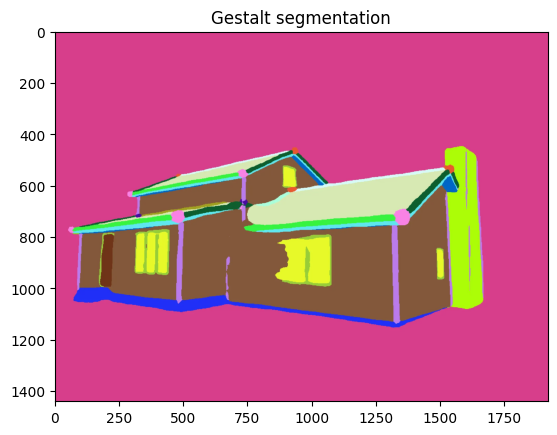

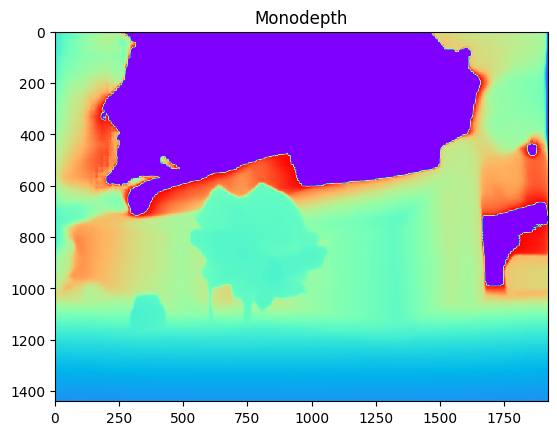

In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(human_entry['gestalt'][0])
plt.title('Gestalt segmentation')

plt.figure()
depth = np.array(human_entry['depthcm'][0])/100.
depth[depth>20] = 0
depth = depth/depth.max()
plt.title('Monodepth')
plt.imshow(depth, cmap='rainbow')


In [12]:
# Here is the prediction and visualization of single entry
key, vertices, edges = predict(entry, visualize=True)

In [6]:
from hoho import compute_WED

compute_WED(vertices,
            edges,
            np.array(entry['wf_vertices']),
            np.array(entry['wf_edges']),
            cv=1, ce=1)

1.6093560850517319

In [7]:
compute_WED(vertices,
            edges,
            np.array(entry['wf_vertices']),
            np.array(entry['wf_edges']),
            cv=438, ce=1)

166.98052955030022